In [50]:
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [51]:
from matplotlib import pyplot as pp
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pp.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [58]:
df = pd.read_csv('train.csv')
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,01/01/2013,25,103665,7.0,NaN
1,1,01/01/2013,25,105574,1.0,NaN
2,2,01/01/2013,25,105575,2.0,NaN
3,3,01/01/2013,25,108079,1.0,NaN
4,4,01/01/2013,25,108701,1.0,NaN


In [62]:
dt = df[['store_nbr', 'unit_sales']]
a = dt.groupby(["store_nbr"]).sum()

In [63]:
b =a.sort_values(['unit_sales'], ascending = False)
b.head()

,unit_sales
store_nbr,
44,615660.239
45,487900.733
47,482367.503
3,445768.398
46,440871.510


=> Top 4 stores have the highest sum unit sales is 44, 45, 47 and 3.

In [64]:
store44 = df[df['store_nbr'] == 44]
store44 = store44[['date', 'unit_sales']]
store44.head()

,date,unit_sales
32292,02/01/2013,12.0
32293,02/01/2013,20.0
32294,02/01/2013,51.0
32295,02/01/2013,74.0
32296,02/01/2013,23.0


In [65]:
store44 = store44.groupby(["date"]).sum().reset_index()
store44["date"] = pd.to_datetime(store44["date"], format = "%d/%m/%Y")
store44.set_index("date")

,unit_sales
date,
2013-01-02,30095.181
2013-01-03,20447.057
2013-01-04,22795.799
2013-01-05,31382.508
2013-01-06,36069.345
2013-01-07,21025.329
2013-01-08,33993.257
2013-01-09,21296.042
2013-01-10,15522.828


In [10]:
# Checking the missing values
store44.isnull().sum()

date          0
unit_sales    0
dtype: int64

From above we can see there is no missing values in the dataset

In [11]:
store44.describe()

,unit_sales
count,26.000000
mean,23679.239962
std,6951.443716
min,12230.950000
25%,17856.986750
50%,21645.457500
75%,29857.811750
max,36069.345000


<AxesSubplot:>

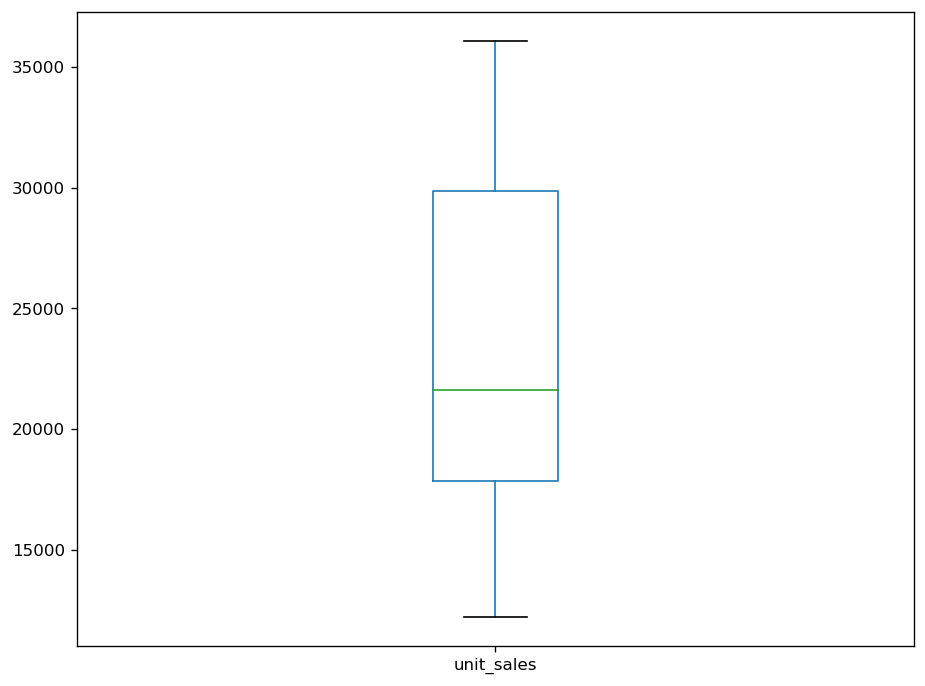

In [66]:
# box-plot
store44.plot(kind = 'box')

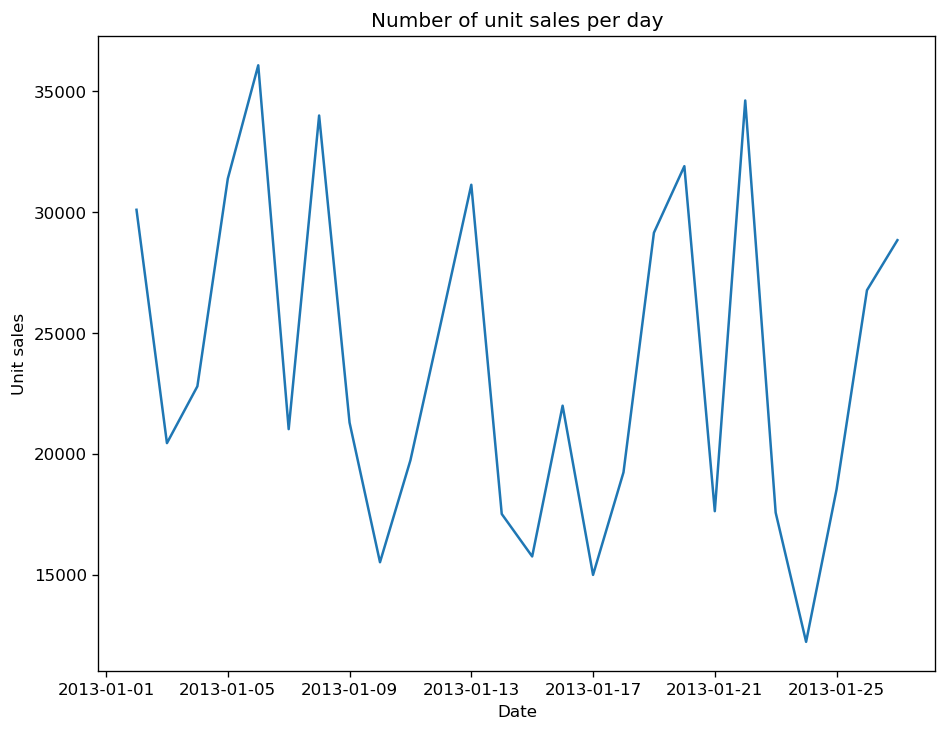

In [12]:
pp.plot(store44["date"], store44["unit_sales"])
pp.title("Number of unit sales per day")
pp.ylabel('Unit sales')
pp.xlabel('Date')
pp.show()

Text(0.5, 0, 'Date')

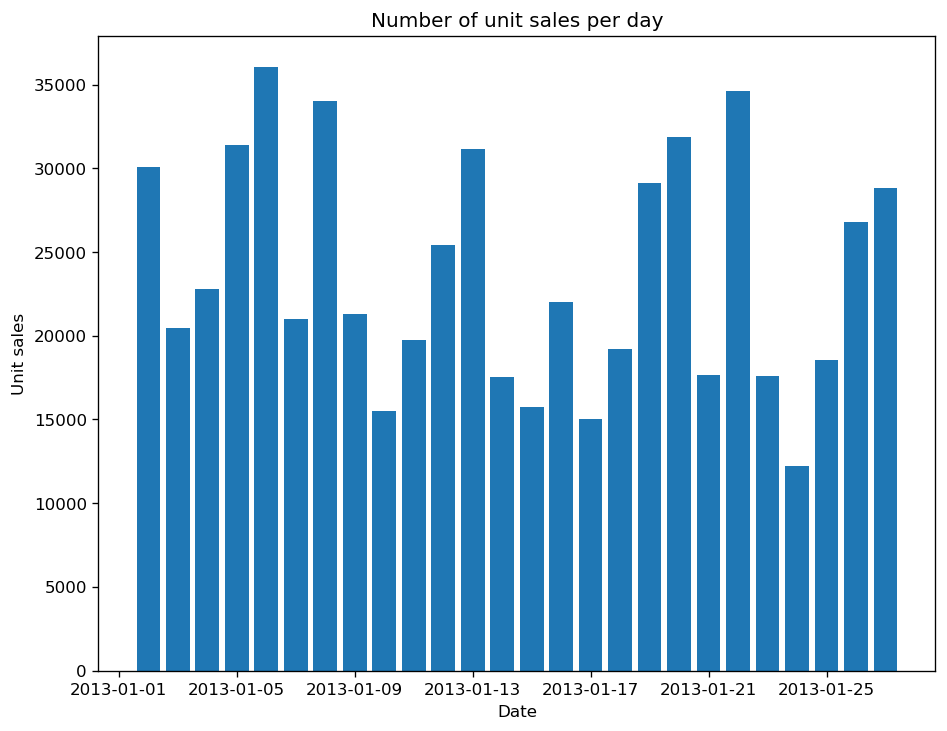

In [13]:
pp.bar(store44["date"], store44["unit_sales"])
pp.title("Number of unit sales per day")
pp.ylabel('Unit sales')
pp.xlabel('Date')

In [31]:
# Create Training and Test
train = store44[:21].set_index('date')
test = store44[20:].set_index('date')
train

,unit_sales
date,
2013-01-02,30095.181
2013-01-03,20447.057
2013-01-04,22795.799
2013-01-05,31382.508
2013-01-06,36069.345
2013-01-07,21025.329
2013-01-08,33993.257
2013-01-09,21296.042
2013-01-10,15522.828


In [32]:
test

,unit_sales
date,
2013-01-22,34614.042
2013-01-23,17574.106
2013-01-24,12230.950
2013-01-25,18529.643
2013-01-26,26769.391
2013-01-27,28839.307


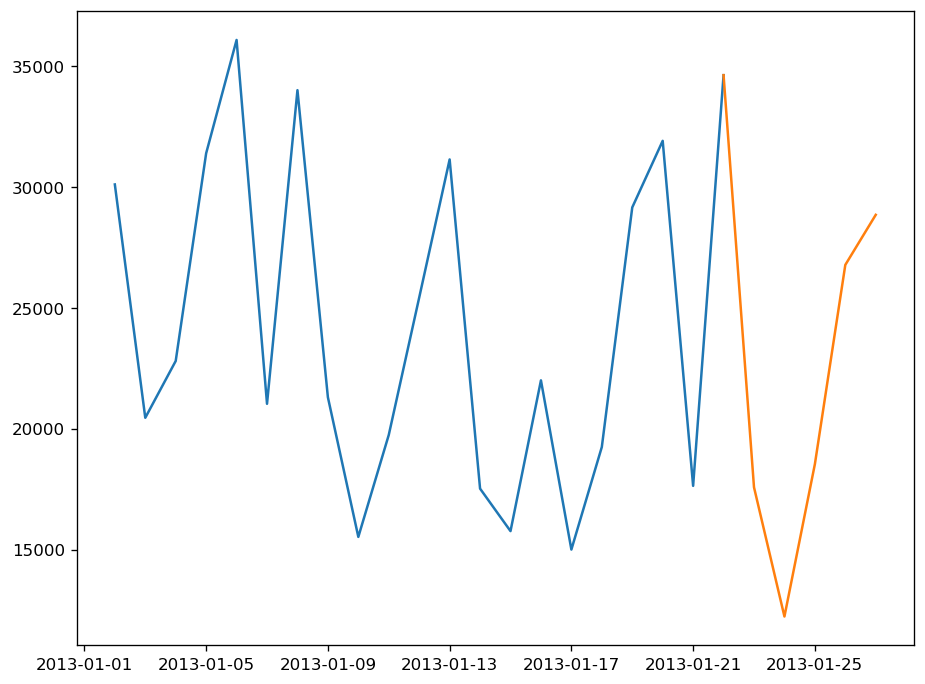

In [33]:
pp.plot(train)
pp.plot(test) 

In [19]:
# Dickey–Fuller test:
result = adfuller(train["unit_sales"])
print('ADF Statistic: %f' % result[0])
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
    print("=>> Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary (Chuỗi dừng)")
else:
    print("=>> Weak evidence against null hypothesis,indicating it is non-stationary (Chuỗi không dừng) ")


ADF Statistic: -3.989352
p-value: 0.0014673075177345746
Critical Values:
	1%: -3.8092091249999998
	5%: -3.0216450000000004
	10%: -2.6507125
=>> Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary (Chuỗi dừng)


date
2013-01-02    30095.181
2013-01-03    20447.057
2013-01-04    22795.799
2013-01-05    31382.508
2013-01-06    36069.345
2013-01-07    21025.329
2013-01-08    33993.257
2013-01-09    21296.042
2013-01-10    15522.828
2013-01-11    19738.475
2013-01-12    25418.678
2013-01-13    31129.350
2013-01-14    17518.412
2013-01-15    15761.721
2013-01-16    21994.873
2013-01-17    14999.145
2013-01-18    19238.575
2013-01-19    29145.704
2013-01-20    31897.753
2013-01-21    17632.768
2013-01-22    34614.042
Name: unit_sales, dtype: float64

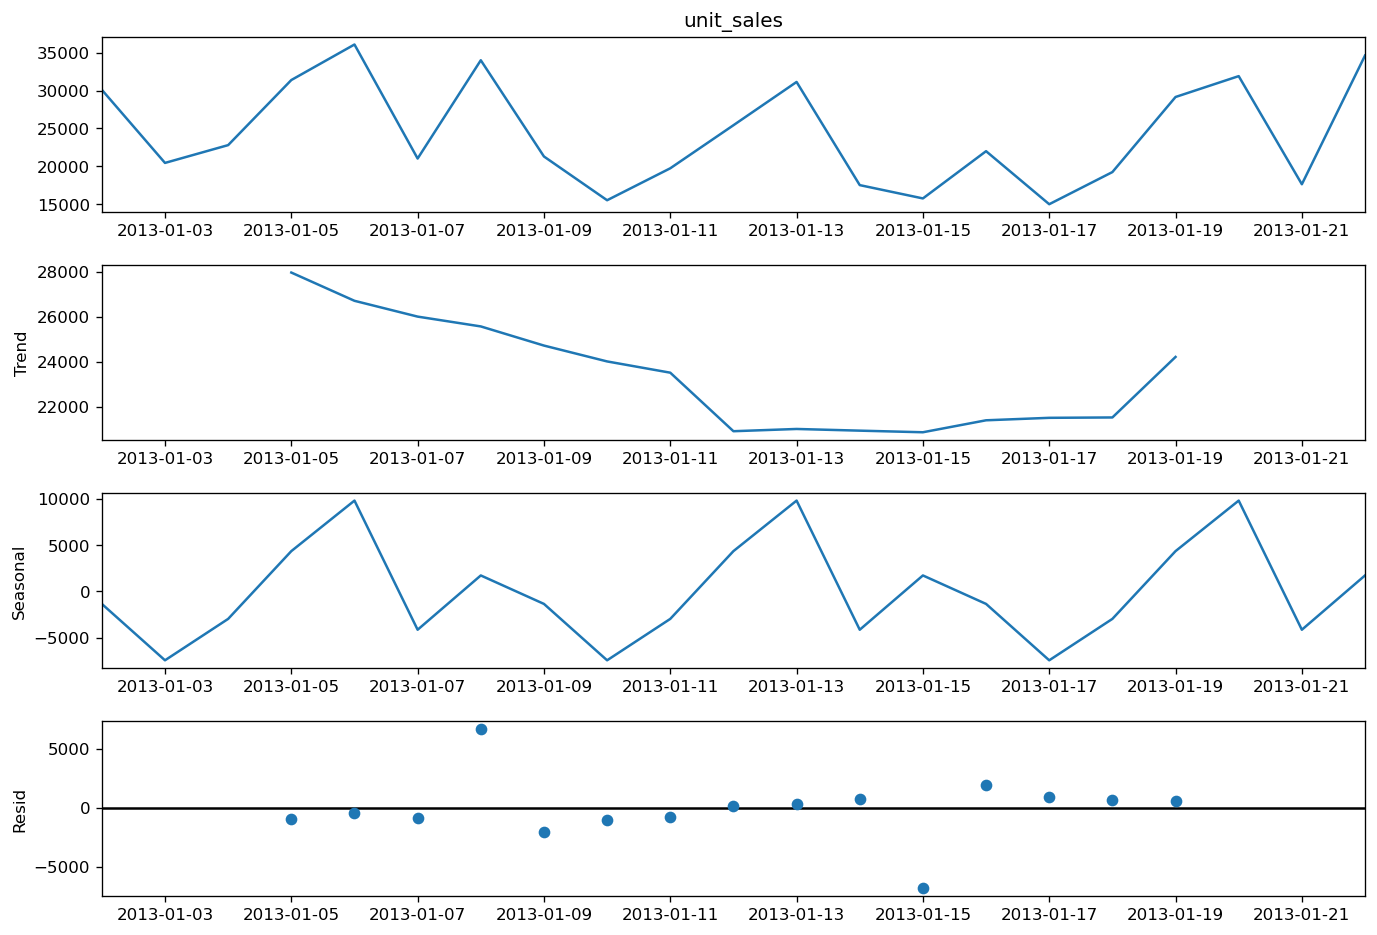

In [34]:
result = seasonal_decompose(train["unit_sales"], model='additive')
fig = result.plot()
fig.set_size_inches(12,8)
x=result.observed
x

<Figure size 1440x720 with 0 Axes>

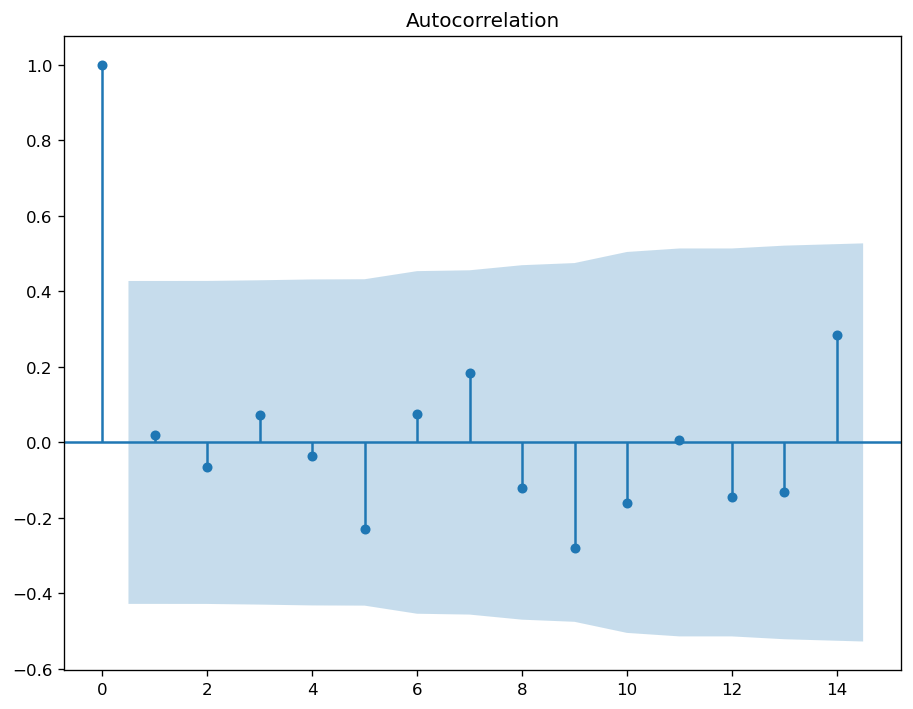

In [35]:
#ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pp.figure(figsize=(12, 6))
ax1 = plot_acf(x)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 10.

<Figure size 1440x1200 with 0 Axes>

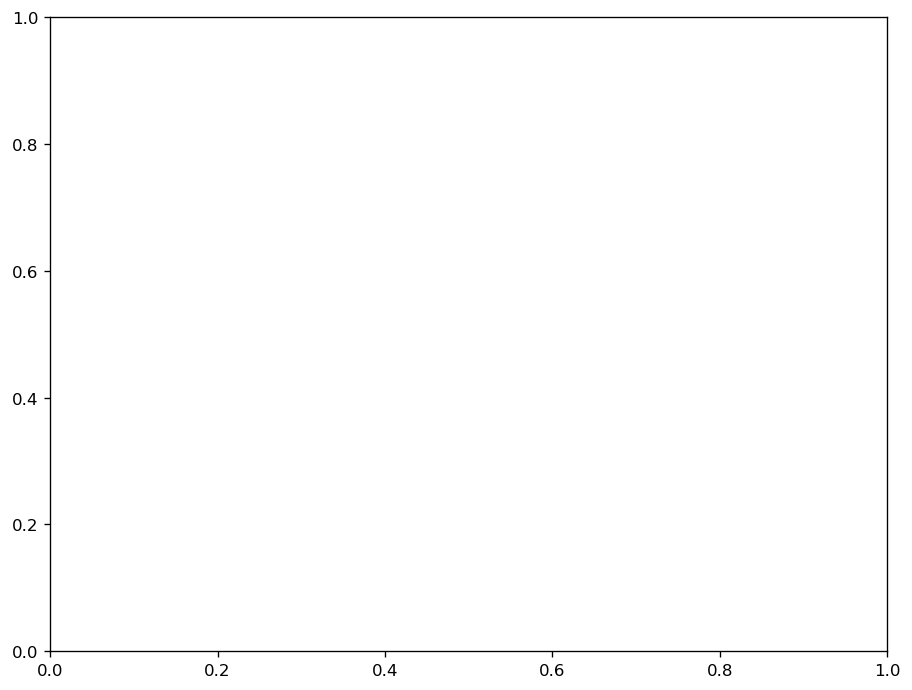

In [67]:
#PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pp.figure(figsize=(12,10))
ax2=plot_pacf(x) 

In [37]:
# Import the library 
from pmdarima.arima import auto_arima
# Fit auto_arima function to  dataset 
model_fit = auto_arima(train["unit_sales"], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 1, 
                          start_P = 0, seasonal = False, 
                          d = 0, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = False)
# To print the summary 
model_fit.summary()

Fit ARIMA: order=(1, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1); AIC=439.943, BIC=445.166, Fit time=0.318 seconds
Fit ARIMA: order=(2, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 3); AIC=439.726, BIC=447.038, Fit time=0.451 seconds
Fit ARIMA: order=(3, 0, 1); AIC=441.808, BIC=448.075, Fit time=0.474 seconds
Fit ARIMA: order=(3, 0, 2); AIC=439.349, BIC=446.661, Fit time=0.425 seconds
Fit ARIMA: order=(3, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.763 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                     ARMA(3, 2)   Log Likelihood                -212.674
Method:                       css-mle   S.D. of innovations           5505.400
Date:                Sun, 04 Apr 2021   AIC                            439.349
Time:                        10:45:33   BIC                            446.661
Sample:                             0   HQIC                           440.936
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.437e+04   1712.450     14.230      0.000     2.1e+04    2.77e+04
ar.L1.y       -0.0716      0.283     -0.252      0.801      -0.627       0.484
ar.L2.y       -0.7960      0.158     -5.022      0.000      -1.107      -0.485
ar.L3.y        0.3439      0.231      1.487      0.137      -0.109       0.797
ma.L1.y        0.2087      0.277      0.754      0.451      -0.334       0.751
ma.L2.y        1.0000      0.197      5.069      0.000       0.613       1.387
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2272           -0.9993j            1.0248           -0.2856
AR.2           -0.2272           +0.9993j            1.0248            0.2856
AR.3            2.7690           -0.0000j            2.7690           -0.0000
MA.1           -0.1044           -0.9945j            1.0000           -0.2666
MA.2           -0.1044           +0.9945j            1.0000            0.2666
-----------------------------------------------------------------------------
"""

<Figure size 1440x720 with 0 Axes>

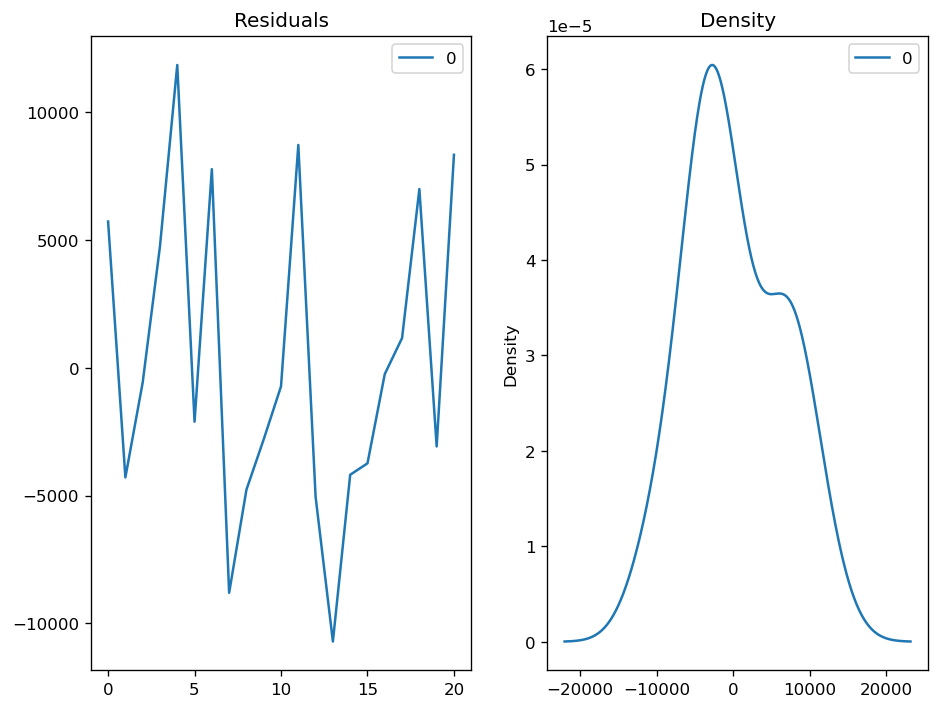

In [42]:
# Kiem tra phuong sai
residuals = pd.DataFrame(model_fit.resid())
pp.figure(figsize=(12, 6))
fig, ax = pp.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
pp.show()

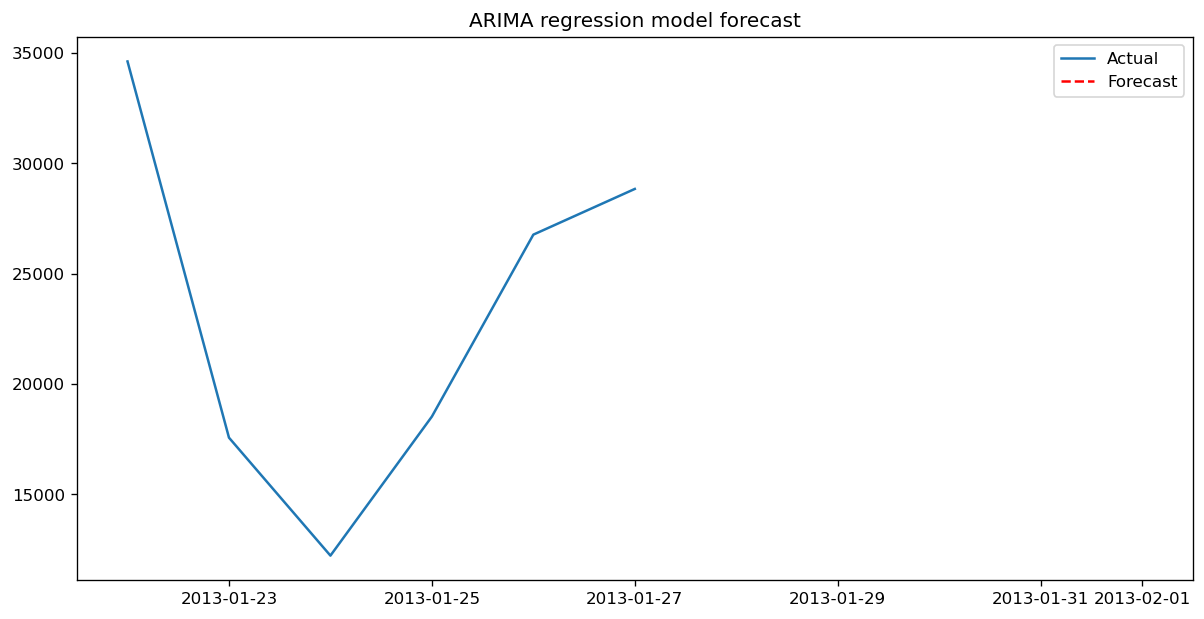

In [49]:
n_pred_perious = 1
fitted, confint = model_fit.predict(n_periods=n_pred_perious, return_conf_int=True)
date = pd.date_range(train.index[-1], periods=n_pred_perious, freq='MS')

fitted_seri = pd.Series(fitted, index=date)
lower = confint[:, 0]
upper = confint[:, 1]

pp.figure(figsize=(12, 6))
pp.plot(test, label='Actual')
pp.plot(fitted_seri, color='red', linestyle='--', label = 'Forecast')
pp.legend()
pp.title('ARIMA regression model forecast')
pp.show()